In [ ]:
import yfinance as yf
import pandas as pd

# Ambil data saham AXA (CS.PA)
ticker = "CS.PA"
stock = yf.Ticker(ticker)

# ===================== BAGIAN 1: MENGUMPULKAN DATA =====================

# Cek daftar akun balance sheet dan income statement yang tersedia
print("Akun di Balance Sheet:", stock.balance_sheet.index)
print("Akun di Income Statement:", stock.financials.index)

# Ambil Net Income per tahun
try:
    net_income_annual = stock.financials.loc["Net Income"]
except KeyError:
    net_income_annual = None
    print("Net Income tidak ditemukan!")

# Cek nama akun untuk Total Equity
possible_equity_names = ["Total Stockholder Equity", "Total Equity", "Common Stock Equity"]
equity_annual = None
for name in possible_equity_names:
    if name in stock.balance_sheet.index:
        equity_annual = stock.balance_sheet.loc[name]
        break

if equity_annual is None:
    print("Total Equity tidak ditemukan!")

# Ambil Total Assets per tahun
total_assets_annual = stock.balance_sheet.loc["Total Assets"] if "Total Assets" in stock.balance_sheet.index else None

# Ambil EPS per tahun
try:
    eps_annual = net_income_annual / stock.info["sharesOutstanding"]
except KeyError:
    eps_annual = None
    print("EPS tidak ditemukan!")

# Ambil data tambahan
book_value = stock.info.get("bookValue", None)
price = stock.info.get("currentPrice", None)

# Gabungkan semua data dalam bentuk tabel DataFrame
data = pd.DataFrame({
    "Net Income": net_income_annual,
    "Total Equity": equity_annual,
    "Total Assets": total_assets_annual,
    "EPS": eps_annual
}).transpose()

print("\n=== Data Keuangan AXA (CS.PA) ===")
print(data)

Akun di Balance Sheet: Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Net Tangible Assets', 'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Other Equity Interest', 'Treasury Stock',
       'Retained Earnings', 'Additional Paid In Capital', 'Capital Stock',
       'Common Stock', 'Total Liabilities Net Minority Interest',
       'Preferred Securities Outside Stock Equity',
       'Derivative Product Liabilities', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation', 'Long Term Debt',
       'Long Term Provisions', 'Current Debt And Capital Lease Obligation',
       'Current Debt', 'Payables', 'Other Payable', 'Total Tax Payable',
       'Accounts Payable', 'Total Assets', 'Defined Pension Benefit',
  

In [ ]:
data

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Net Income,7189000000.0,5061000000.0,7294000000.0,3164000000.0
Total Equity,49579000000.0,46072000000.0,51885000000.0,71610000000.0
Total Assets,644449000000.0,638357000000.0,731251000000.0,804589000000.0
EPS,3.272934,2.30412,3.320738,1.440474


In [ ]:
#Transpose DataFrame
df = data.T
df

,Net Income,Total Equity,Total Assets,EPS
2023-12-31,7189000000.0,49579000000.0,644449000000.0,3.272934
2022-12-31,5061000000.0,46072000000.0,638357000000.0,2.30412
2021-12-31,7294000000.0,51885000000.0,731251000000.0,3.320738
2020-12-31,3164000000.0,71610000000.0,804589000000.0,1.440474


In [ ]:
# Ubah nama baris (index) menjadi tahun
df.index = df.index.astype(str).str[:4] # Mengambil 4 karakter pertama dari index
df

,Net Income,Total Equity,Total Assets,EPS
2023,7189000000.0,49579000000.0,644449000000.0,3.272934
2022,5061000000.0,46072000000.0,638357000000.0,2.30412
2021,7294000000.0,51885000000.0,731251000000.0,3.320738
2020,3164000000.0,71610000000.0,804589000000.0,1.440474


In [ ]:
# Menambahkan data untuk tahun 2024
df.loc["2024"] = [7376000000, 47340000000, 638931000000, 3.35]  # Isi sesuai nilai data baru

# Tampilkan DataFrame setelah ditambahkan
print(df)


        Net Income   Total Equity    Total Assets       EPS
2023  7189000000.0  49579000000.0  644449000000.0  3.272934
2022  5061000000.0  46072000000.0  638357000000.0   2.30412
2021  7294000000.0  51885000000.0  731251000000.0  3.320738
2020  3164000000.0  71610000000.0  804589000000.0  1.440474
2024  7376000000.0  47340000000.0  638931000000.0      3.35


In [ ]:
# Mengganti nilai EPS untuk tahun 2022
df.loc["2023", "EPS"] = 3.31
df.loc["2022", "EPS"] = 2.13
df.loc["2021", "EPS"] = 2.98
df.loc["2020", "EPS"] = 1.25



In [ ]:
df

,Net Income,Total Equity,Total Assets,EPS
2023,7189000000.0,49579000000.0,644449000000.0,3.31
2022,5061000000.0,46072000000.0,638357000000.0,2.13
2021,7294000000.0,51885000000.0,731251000000.0,2.98
2020,3164000000.0,71610000000.0,804589000000.0,1.25
2024,7376000000.0,47340000000.0,638931000000.0,3.35


In [ ]:
import yfinance as yf
import pandas as pd

# Definisikan ticker AXA SA di Yahoo Finance
ticker = "CS.PA"

# Ambil data saham dari Yahoo Finance
stock = yf.Ticker(ticker)

# Ambil harga saham historis (penutupan tahunan)
hist = stock.history(period="5y")  # Data 5 tahun terakhir
hist = hist.resample('Y').last()  # Ambil harga penutupan akhir tahun

# Ambil jumlah saham beredar (outstanding shares)
shares_outstanding = stock.info.get("sharesOutstanding", None)

# Buat DataFrame untuk data saham
stock_data = pd.DataFrame({
    "Year": hist.index.year,
    "Stock Price": hist["Close"].values,
    "Shares Outstanding": shares_outstanding
})

# Data keuangan yang sudah ada (sesuaikan dengan milikmu)
data = {
    "Year": [2023, 2022, 2021, 2020, 2024],
    "Net Income": [7189000000, 5061000000, 7294000000, 3164000000, 7376000000],
    "Total Equity": [49579000000, 46072000000, 51885000000, 71610000000, 47340000000],
    "Total Assets": [644490000000, 638357000000, 731251000000, 804589000000, 638931000000],
    "EPS": [3.31, 2.13, 2.98, 1.25, 3.35],
}

df = pd.DataFrame(data)

# Gabungkan dengan data saham
df = df.merge(stock_data, on="Year", how="left")

# Hitung rasio keuangan
df["ROA (%)"] = (df["Net Income"] / df["Total Assets"]) * 100
df["ROE (%)"] = (df["Net Income"] / df["Total Equity"]) * 100
df["PER"] = df["Stock Price"] / df["EPS"]
df["Book Value per Share"] = df["Total Equity"] / df["Shares Outstanding"]
df["PBV"] = df["Stock Price"] / df["Book Value per Share"]

# Tampilkan hasil
print(df[["Year", "ROA (%)", "ROE (%)", "PER", "PBV"]])


   Year   ROA (%)    ROE (%)        PER       PBV
0  2023  1.115456  14.500091   8.393409  1.230835
1  2022  0.792817  10.984980  10.845174  1.101312
2  2021  0.997469  14.058013   7.304217  0.921466
3  2020  0.393244   4.418377  12.207638  0.468057
4  2024  1.154428  15.580904  10.244776  1.592393


<ipython-input-12-16797962c25d>:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  hist = hist.resample('Y').last()  # Ambil harga penutupan akhir tahun


In [ ]:
df = df.sort_values(by="Year", ascending=False)
df

,Year,Net Income,Total Equity,Total Assets,EPS,Stock Price,Shares Outstanding,ROA (%),ROE (%),PER,Book Value per Share,PBV
4,2024,7376000000,47340000000,638931000000,3.35,34.320000,2196499968,1.154428,15.580904,10.244776,21.552470,1.592393
0,2023,7189000000,49579000000,644490000000,3.31,27.782185,2196499968,1.115456,14.500091,8.393409,22.571819,1.230835
1,2022,5061000000,46072000000,638357000000,2.13,23.100222,2196499968,0.792817,10.984980,10.845174,20.975188,1.101312
2,2021,7294000000,51885000000,731251000000,2.98,21.766567,2196499968,0.997469,14.058013,7.304217,23.621671,0.921466
3,2020,3164000000,71610000000,804589000000,1.25,15.259547,2196499968,0.393244,4.418377,12.207638,32.601867,0.468057


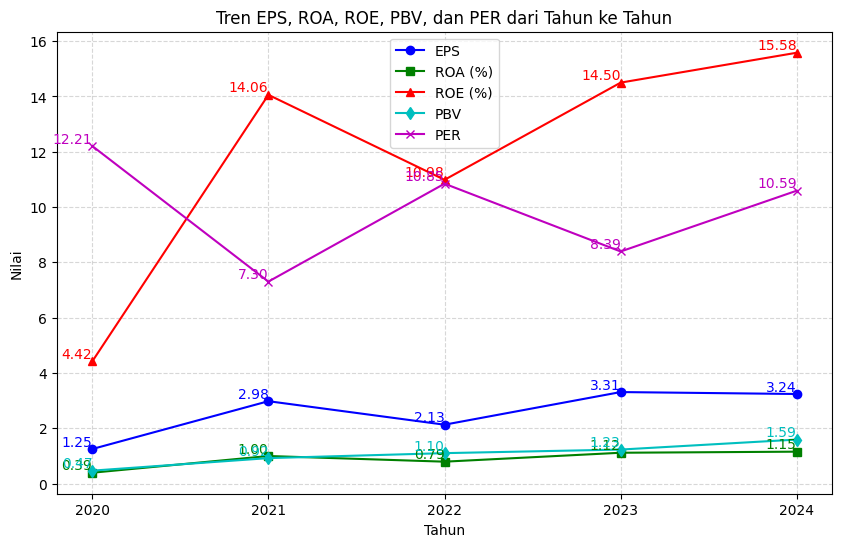

In [ ]:
import matplotlib.pyplot as plt

# Set ukuran figure
plt.figure(figsize=(10, 6))

# Daftar metrik yang akan divisualisasikan
metrics = ["EPS", "ROA (%)", "ROE (%)", "PBV", "PER"]
markers = ['o', 's', '^', 'd', 'x']
colors = ['b', 'g', 'r', 'c', 'm']  # Warna untuk tiap metrik

# Loop untuk plot setiap metrik dan menampilkan angkanya
for metric, marker, color in zip(metrics, markers, colors):
    plt.plot(df["Year"], df[metric], marker=marker, linestyle='-', label=metric, color=color)

    # Menambahkan teks (angka) di setiap titik
    for x, y in zip(df["Year"], df[metric]):
        plt.text(x, y, f"{y:.2f}", ha='right', va='bottom', fontsize=10, color=color)

# Tambahkan judul dan label
plt.title("Tren EPS, ROA, ROE, PBV, dan PER dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Nilai")
plt.xticks(df["Year"])  # Pastikan tahun ditampilkan dengan benar
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Tampilkan plot
plt.show()


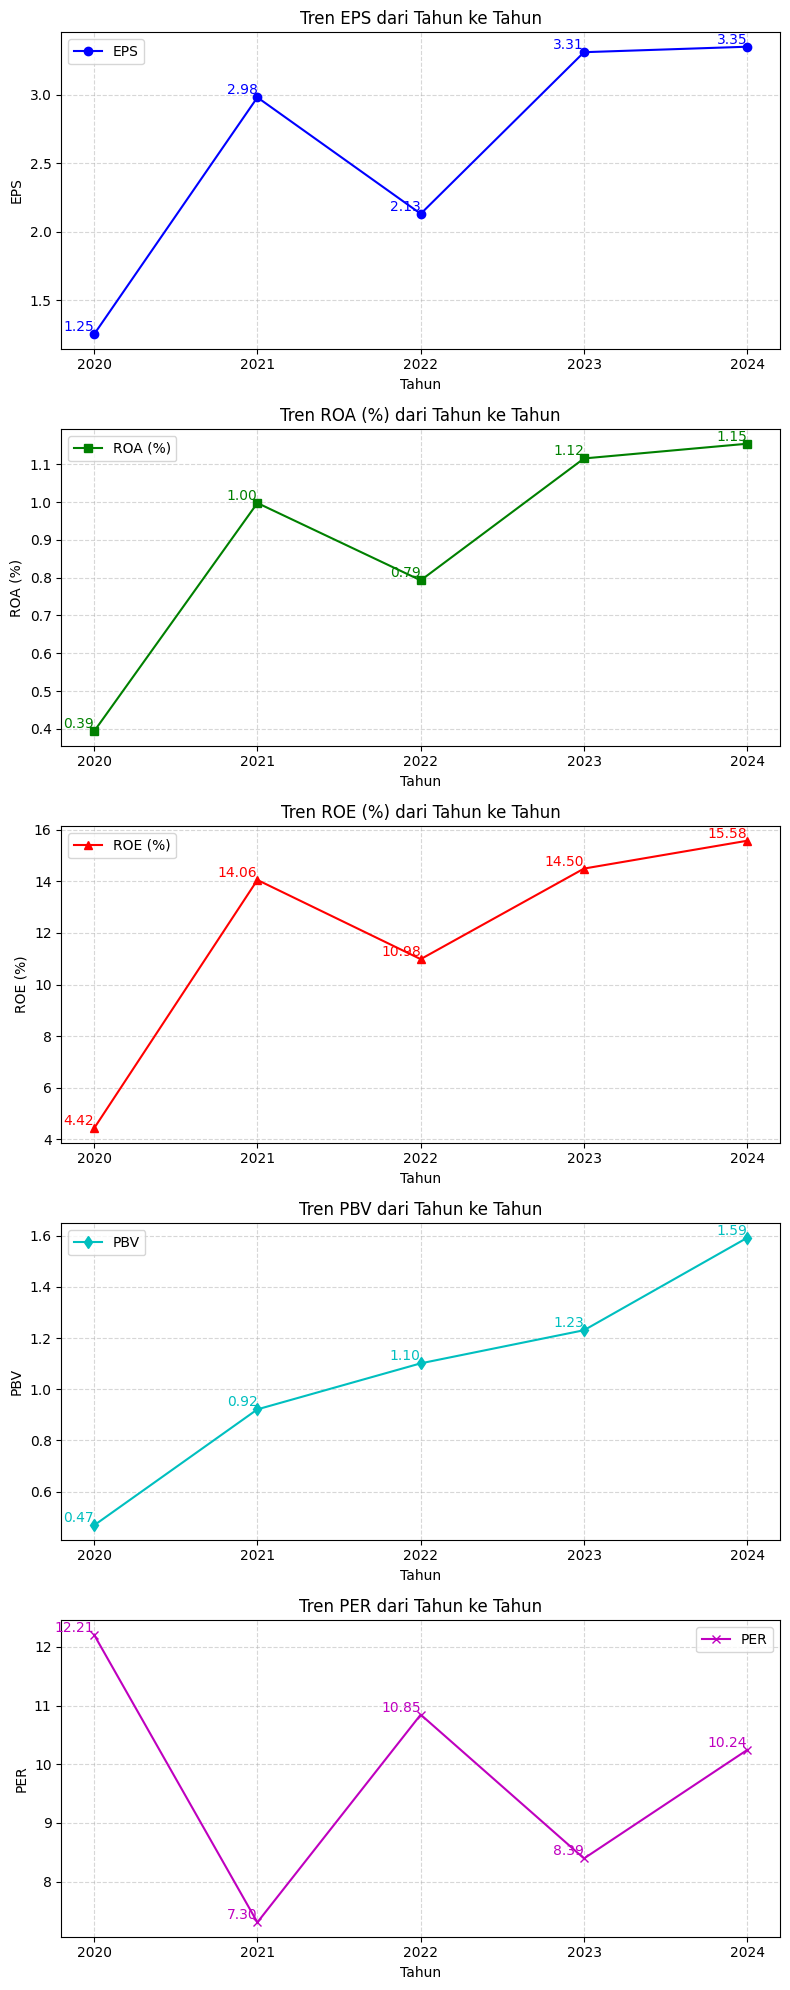

In [ ]:
import matplotlib.pyplot as plt

# Daftar metrik yang akan divisualisasikan
metrics = ["EPS", "ROA (%)", "ROE (%)", "PBV", "PER"]
markers = ['o', 's', '^', 'd', 'x']
colors = ['b', 'g', 'r', 'c', 'm']  # Warna untuk tiap metrik

# Set ukuran figure untuk subplot
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 20))

# Loop untuk plot setiap metrik di subplot masing-masing
for ax, metric, marker, color in zip(axes, metrics, markers, colors):
    ax.plot(df["Year"], df[metric], marker=marker, linestyle='-', label=metric, color=color)

    # Menambahkan teks (angka) di setiap titik
    for x, y in zip(df["Year"], df[metric]):
        ax.text(x, y, f"{y:.2f}", ha='right', va='bottom', fontsize=10, color=color)

    # Set judul dan label
    ax.set_title(f"Tren {metric} dari Tahun ke Tahun")
    ax.set_xlabel("Tahun")
    ax.set_ylabel(metric)
    ax.set_xticks(df["Year"])  # Pastikan tahun ditampilkan dengan benar
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()

# Atur layout agar tidak bertumpuk
plt.tight_layout()
plt.show()
